#Plotting Sigmoid Function

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.colors
import pandas as pd

$S_{w, b}(x) = \frac{1}{1 + e^{-(wx + b)}}$

In [0]:
def sigmoid(x, w, b):
  return 1/(1 + np.exp(-(w*x + b)))

In [4]:
sigmoid(1, 0.5, 0)

0.6224593312018546

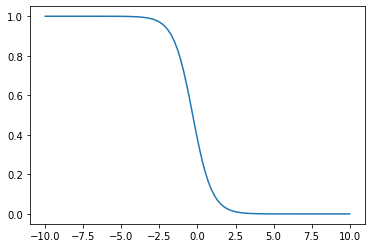

In [5]:
w = -1.6    #@param {type: "slider", min: -2, max: 2, step: 0.1}
b = -0.5  #@param {type: "slider", min: -2, max: 2, step: 0.1}
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)

plt.plot(X, Y)
plt.show()


$S_{w_1, w_2, b}(x_1, x_2) = \frac{1}{1 + e^{-(w_1x_1 + w_2x_2 + b)}}$

In [0]:
def sigmoid_2d(x1, x2, w1, w2, b):
  return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

In [7]:
sigmoid_2d(1, 0, 0.5, 0, 0)

0.6224593312018546

In [8]:
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

XX1, XX2 = np.meshgrid(X1, X2)

print(X1.shape, X2.shape, XX1.shape, XX2.shape)

(100,) (100,) (100, 100) (100, 100)


In [0]:
w1 = 2
w2 = -0.5
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

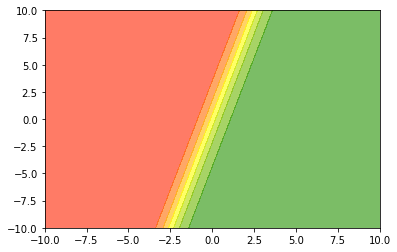

In [11]:
plt.contourf(XX1, XX2, Y, cmap = my_cmap, alpha = 0.6)
plt.show()

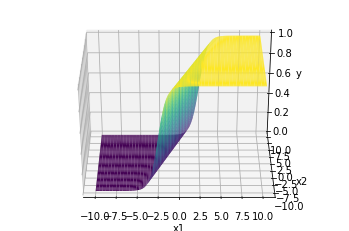

In [12]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 270)


# Compute Loss for a Given Dataset

In [0]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

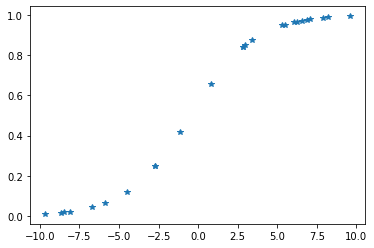

In [14]:
plt.plot(X, Y, '*')
plt.show()

In [0]:
def calculate_loss(X, Y, w_est, b_est):
  loss = 0
  for x, y in zip(X, Y):
    loss += (y - sigmoid(x, w_est, b_est))**2
  return loss

In [0]:
W = np.linspace(0, 2, 101)
B = np.linspace(-1, 1, 101)

WW, BB = np.meshgrid(W, B)

Loss = np.zeros(WW.shape)

In [17]:
WW.shape

(101, 101)

In [0]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j])

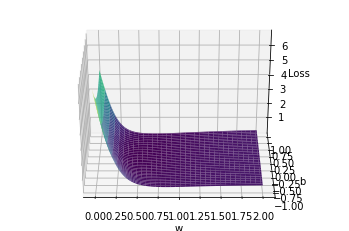

In [19]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

ax.view_init(30, 270)

In [20]:
ij = np.argmin(Loss)
# inbuild method to find row and column
ind = np.unravel_index(np.argmin(Loss, axis=None), Loss.shape)
print(ind)
print(WW[ind], BB[ind])
# by logic to find row and column
# i = int(np.floor(ij/Loss.shape[1]))
# j = int(ij - i * Loss.shape[1])
# print(i, j)
# print(WW[i, j], BB[i, j])

(63, 25)
0.5 0.26


# Class for Sigmoid Neuron

In [0]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))

  # combining above two functions into one function 
  # def model(self,x):
  #   return 1.0/(1.0 + np.exp(-(np.dot(x, self.w.T) + self.b)))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    # y_pred = self.model(x)
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    # y_pred = self.model(x)
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
    
    for i in range(epochs):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)       
      self.w -= learning_rate * dw
      self.b -= learning_rate * db

# Fit for toy data

In [0]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]

In [0]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.25, True)

In [0]:
def plot_sn(X, Y, sn, ax):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1, XX2, YY, cmap=my_cmap, alpha=0.6)
  ax.scatter(X[:,0], X[:,1],c=Y, cmap=my_cmap)
  ax.plot()

[[-1.62057554  0.66989328]] [-0.00907306]
[[-1.42669191  0.75109155]] [-0.09677763]
[[-1.20978725  0.8757009 ]] [-0.13459409]
[[-0.98545272  1.00942789]] [-0.10299965]
[[-0.78673736  1.118217  ]] [-0.05464243]
[[-0.64105539  1.15660465]] [-0.02857674]
[[-0.50118882  1.15069834]] [-0.01556474]
[[-0.32829403  1.10900755]] [-0.00834829]
[[-0.06475863  1.01809132]] [-0.0020716]
[[0.40040648 0.8364374 ]] [0.01008386]
[[0.72981151 0.61751447]] [0.00506321]
[[0.8366091  0.32864198]] [0.03763842]
[[ 0.90323532 -0.12143602]] [0.07346305]
[[ 0.90545006 -0.44602672]] [0.00165266]
[[ 1.07065957 -0.24013243]] [-0.05417608]
[[ 1.07664385 -0.4543166 ]] [-0.11789396]
[[ 1.19075339 -0.32788534]] [-0.16538904]
[[ 1.20991743 -0.4477515 ]] [-0.21525446]
[[ 1.28119742 -0.39930963]] [-0.25451548]
[[ 1.31323057 -0.44767409]] [-0.29309605]
[[ 1.3592009  -0.44477565]] [-0.32655007]
[[ 1.39445125 -0.46280463]] [-0.35806174]
[[ 1.42992679 -0.47207446]] [-0.38689428]
[[ 1.46231211 -0.48298956]] [-0.41374169]
[[ 1

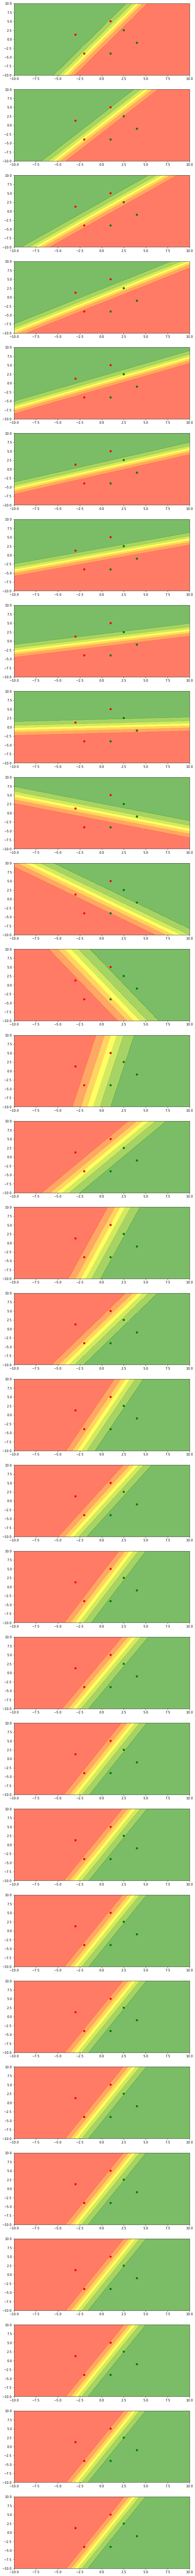

In [39]:
sn.fit(X, Y, 1, 0.05, True)
N = 30
plt.figure(figsize=(10, N*5))
for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1, i + 1)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.5, False)